In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_columns',False)

## Step 1 : Reading and Understanding the Data

In [3]:
lead_df=pd.read_csv('Leads.csv') # Reading leads dataframe as lead_df
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Inspect the various aspects of the data dataframe

In [4]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Get the summary of the dataframe using 'describe()'
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Get the shape of the dataset
lead_df.shape

(9240, 37)

## Step : 2 Data Cleaning

As We have noted the dataframe contains some ```Select``` values it means these are the Missing values

In [7]:
# Replacing Select values with nan values
lead_df = lead_df.replace('Select', np.nan)

In [8]:
# Checking whether if there is any missing value.
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

Here we found that lots of ```Missing values``` are there it should be treated well

In [9]:
# Checking for duplicates values
lead_df.loc[lead_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


Droping the Columns for large number of ```Missing Values```

In [10]:
# Removing columns whch column containd more than 40% of Missing Values
cols=lead_df.columns[round((lead_df.isnull().sum()/len(lead_df))*100)>=40]
lead_df=lead_df.drop(cols,1)

In [11]:
# dropping 'Tags' as these features is derived by sales team
lead_df.drop('Tags',1,inplace=True)

In [12]:
# Finding the Labels contains in the Country Variable
lead_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Belgium                    2
Asia/Pacific Region        2
China                      2
Bangladesh                 2
Philippines                2
Italy                      2
Uganda                     2
Ghana                      2
Netherlands                2
Indonesia                  1
Denmark                    1
Malaysia                   1
Sri Lanka                  1
Kenya                      1
Tanzania                   1
Liberia       

In [13]:
# imputing  "India" as its common occurance in Country Column
lead_df['Country']=lead_df['Country'].replace(np.nan,'India')

In [14]:
# Finding the Labels contains in the Specialization Variable
lead_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [15]:
# Imputing  "Finance Management" as its common occurance in Specialization Column
lead_df['Specialization']=lead_df['Specialization'].replace(np.nan,'Finance Management')

In [16]:
# Finding the Labels contains in the "What is your current occupation" Variable
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [17]:
# Imputing  "Unemployed" as its common occurance in What is your current occupation Column
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [18]:
# Finding the Labels contains in the "What matters most to you in choosing a course" Variable
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [19]:
# Dropping "What matters most to you in choosing a course" as we have almost same value for colums
lead_df.drop('What matters most to you in choosing a course',1,inplace=True)

In [20]:
# Finding the Labels contains in the "Last Activity Variable
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [21]:
# Imputing "Email Opened" as its common occurance in Last Activity Column
lead_df['Last Activity']=lead_df['Last Activity'].fillna('Email Opened')

In [22]:
# Finding the Labels contains in the "Last Activity Variable
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
youtubechannel          1
blog                    1
Pay per Click Ads       1
NC_EDM                  1
testone                 1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [23]:
# imputing  "Google" as its common occurance in Lead Source Column
lead_df['Lead Source']=lead_df['Lead Source'].replace(np.nan,'Google')

In [24]:
# here we have found that google and Google is same just a typo hence we replaced it google to Google.
lead_df['Lead Source']=lead_df['Lead Source'].replace('google','Google')

In [25]:
lead_df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

### Outlier Detection

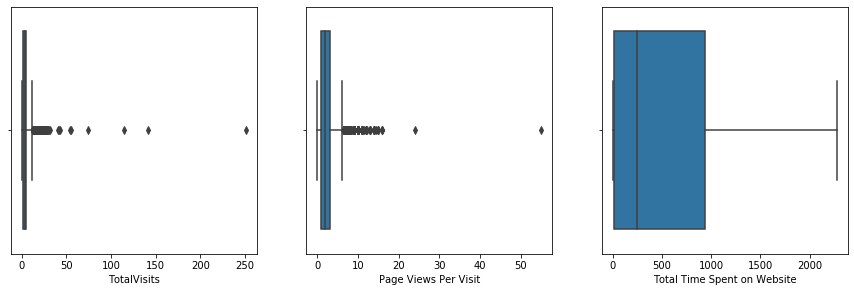

In [26]:
# Finding the outliers
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(lead_df['TotalVisits'])
plt.subplot(2,3,2)
sns.boxplot(lead_df['Page Views Per Visit'])
plt.subplot(2,3,3)
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

Outliers are Present in both the Variables ```TotalVisits``` and ```Page Views Per Visit``` it should be treated and the value spreaded above median highly in ```Total Time Spent on Website```


Imputing ```Median``` to the Misssing values

In [27]:
# Imputing Median as it is a Continueous type
lead_df['TotalVisits']=lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median())
lead_df['Page Views Per Visit']=lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median())

In [28]:
lead_df[pd.isnull(lead_df).any(axis=1)==True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### Reinspecting Null Values

In [29]:
round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

No Null Values are remaining in the dataset

In [30]:
# making lead number as index
lead_df=lead_df.set_index('Lead Number')
lead_df.drop(['Prospect ID'],1,inplace=True)

In [31]:
# Storing column with dtype object and column with dtype number in two different list, so we can easily Perform analysis 
col_obj=list(lead_df.loc[:, lead_df.dtypes == np.object].columns)
col_num=list(lead_df.loc[:, lead_df.dtypes == np.int64].columns)
col_num+=(list(lead_df.loc[:, lead_df.dtypes == np.number].columns))
print('columns with object dtype \n {} \n \n columns with number dtype \n {}'.format(col_obj,col_num))

columns with object dtype 
 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 
 
 columns with number dtype 
 ['Converted', 'Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']


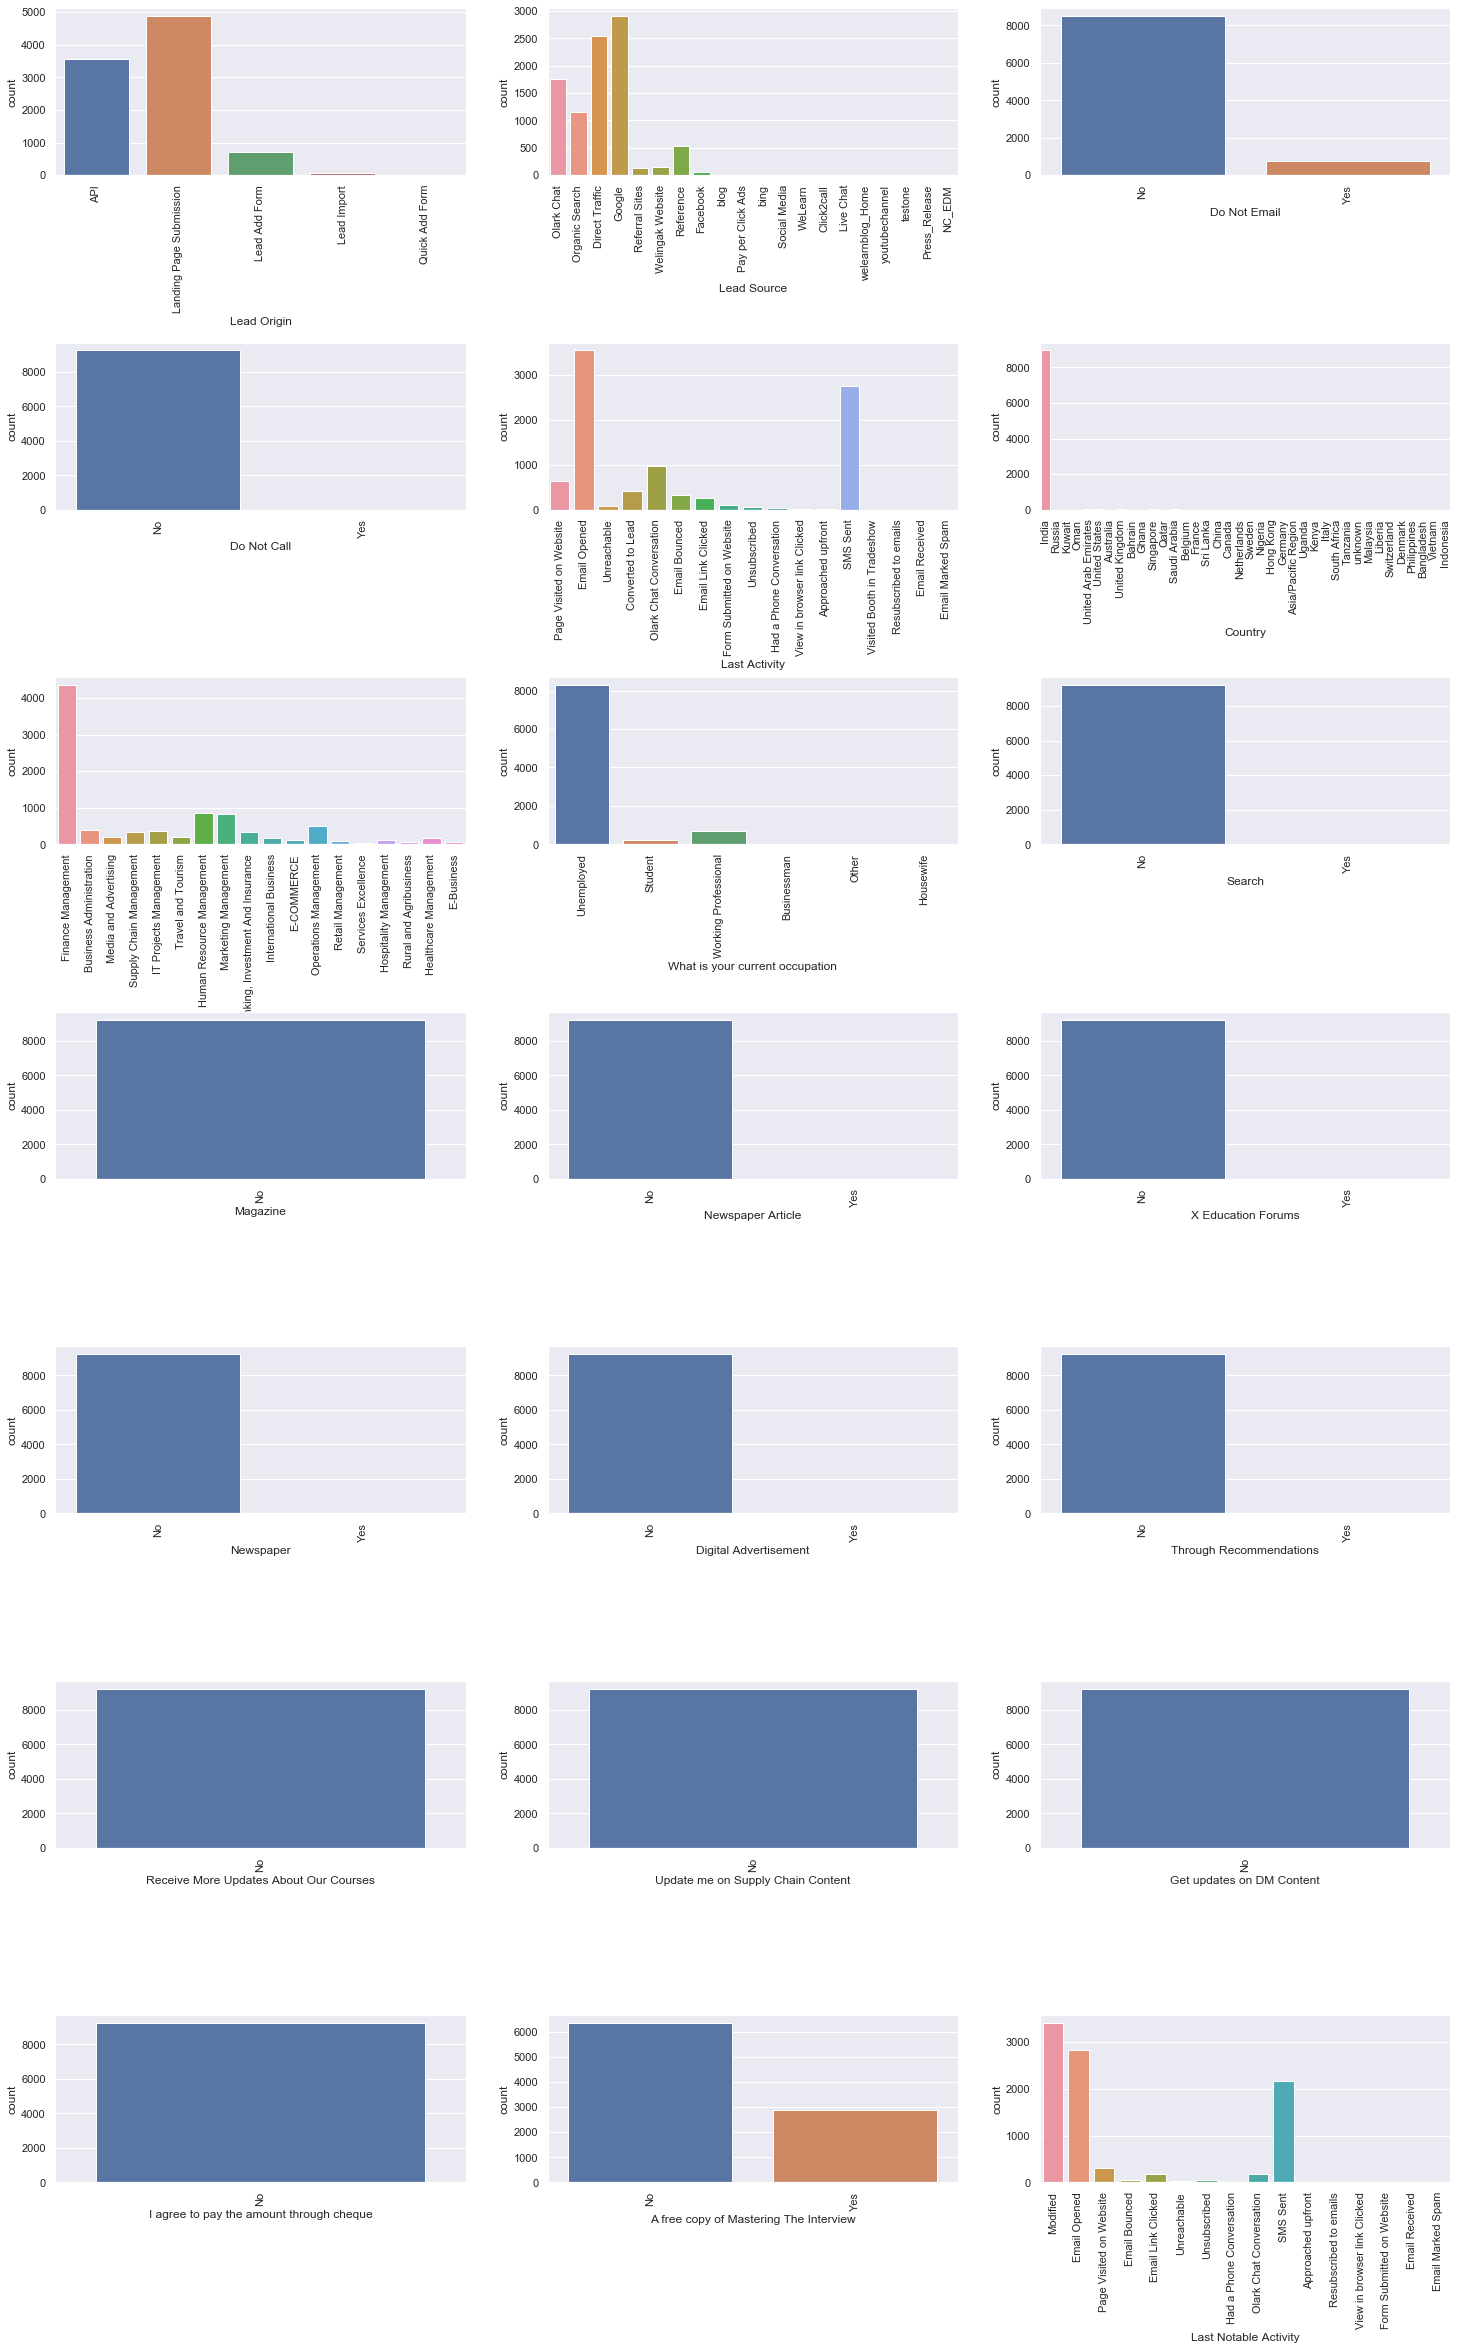

In [32]:
# plotting countplot for object dtype and histogram for number to get data distribution
plt.figure(figsize=(25,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(col_obj):
    plt.subplot(7,3, i[0]+1)
    sns.countplot(i[1],data=lead_df) 
    plt.xticks(rotation=90)
plt.show()

#### Insights 
- We can see that there are many colums which are highly skewed or only one values i.e 'Magazine'... we Can remove these colums as this will not help in model building.
 
- There are cloumns which have many categories(>5), here we can impute  new value 'Other' for which are occured less.

Removing Highly Skewed variables and if Column contains Single Labels

In [33]:
# Taking care of highly skewed columns  and one value only
lead_df=lead_df.drop(['What is your current occupation','Do Not Call','Do Not Email','Country','Search',\
                      'X Education Forums','Newspaper','Newspaper Article','Through Recommendations','Digital Advertisement'],1)

In [34]:
# Droping those variables which contains two labels but one is very High and another is very less number of labels.
lead_df=lead_df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',\
                      'Get updates on DM Content','I agree to pay the amount through cheque', ],1)
col_obj=lead_df.loc[:, lead_df.dtypes == np.object].columns

Maintaing the labels which Column contains lots of labels

In [35]:
# changing categories which are occured less than 1000
col_dict_ls=dict(lead_df['Lead Source'].value_counts()<1000)

# labels which are occured less like Reference,Reffereal site we can impute to 'Other'
for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        lead_df['Lead Source']=lead_df['Lead Source'].replace(i,'Other')

In [36]:
# Changing categories which are occured less than 300
col_dict_la=dict(lead_df['Last Activity'].value_counts()<300)
# labels which are occured less like Resubscribed to emails ,Visited Booth in Tradeshow...those are impute to 'Other'

for i in col_dict_la.keys():
    if col_dict_la[i]==True:
        lead_df['Last Activity']=lead_df['Last Activity'].replace(i,'Other')

In [37]:
# Changing categories which are occured less than 500
col_dict_lna=dict(lead_df['Last Notable Activity'].value_counts()<500)
# labels which are occured less like Reference,Reffereal site we can impute to 'Other'

for i in col_dict_lna.keys():
    if col_dict_lna[i]==True:
        lead_df['Last Notable Activity']=lead_df['Last Notable Activity'].replace(i,'Other')

In [38]:
# Changing categories which are occured less than 350
col_dict_spec=dict(lead_df['Specialization'].value_counts()<350)
# labels which are occured less like E-Business,Retail Management we can impute to 'Other'

for i in col_dict_spec.keys():
    if col_dict_spec[i]==True:
        lead_df['Specialization']=lead_df['Specialization'].replace(i,'Other')

## Step : 3 Exploratory Data Analysis

#### Univariate Analysis (Categorical)

In [39]:
# crating cols which contains only Categorical variable
cols=lead_df.loc[:, lead_df.dtypes == np.object].columns
cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

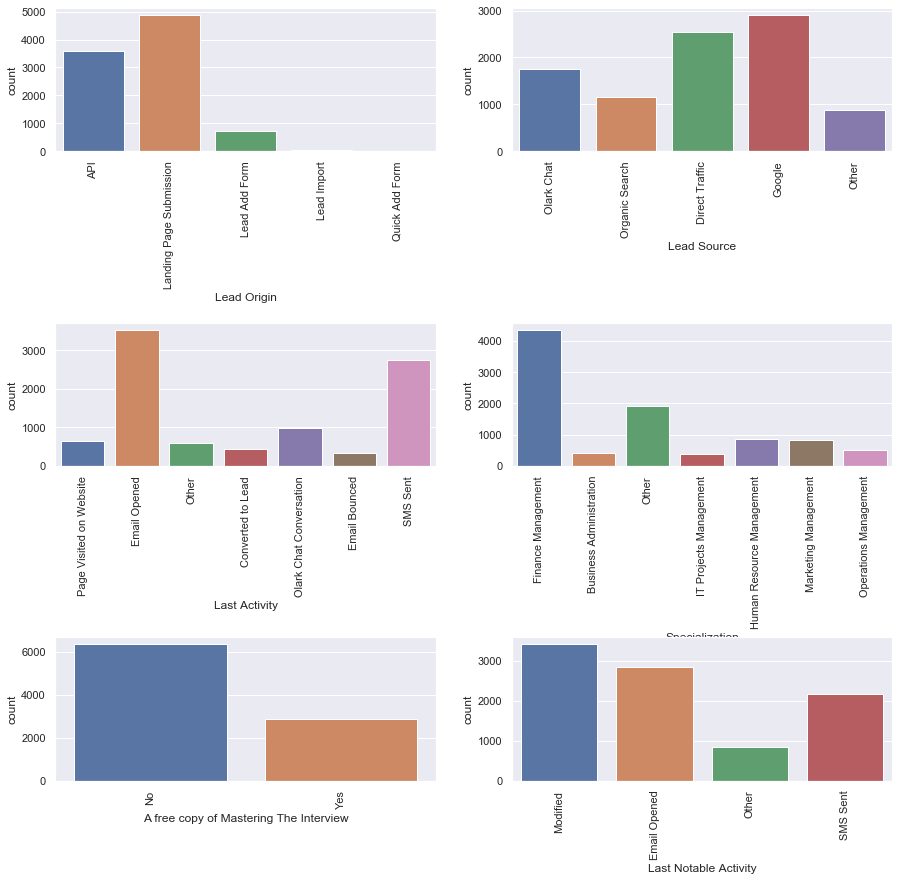

In [40]:
plt.figure(figsize=(15,20))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(i[1],data=lead_df)
    plt.xticks(rotation=90)
plt.savefig('EDA_uni.png',dpi=300,transparent=True)
plt.show()

#### Insights :-
    - In Lead Source Direct Traffic and Google are the two main source for Leads
    - The Number of values is High in Email Opened and SMS Sent in Last Activity
    - Most of the people chooses Finance Management Specialization rather than other Specialization
    - The IT Project management have very lees so that most of the People not prefered this Specialoization

#### Univariate Analysis(Contenious)

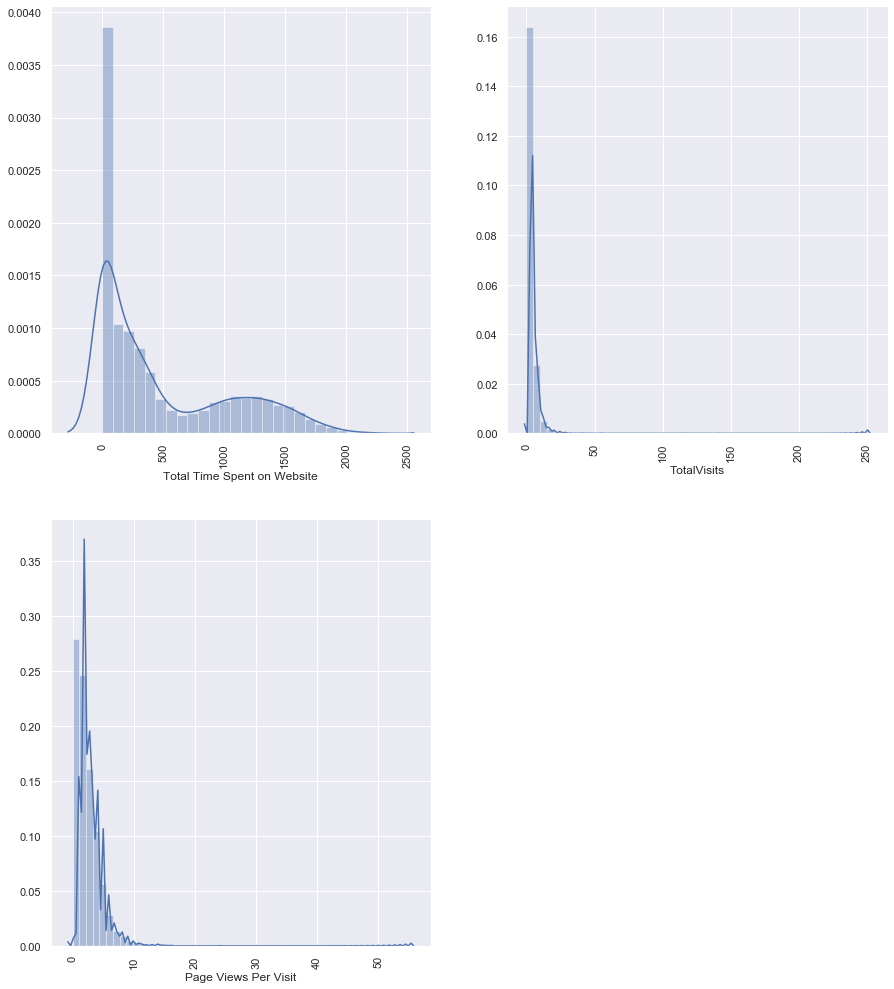

In [41]:
col_num.remove('Converted')

plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=.01)
for i in enumerate(col_num):
    
    plt.subplot(2,2, i[0]+1)
    sns.distplot(lead_df[i[1]])
    
    plt.xticks(rotation=90)
# plt.savefig('coniouus_univar.png',dpi=300,transparent=True)
plt.show()

#### Insights :-
- None of the Continueous Variables are in Normal distribution
- Presence of Outliers in Total Visits and Page Views Per Visit
- In total visits more values is between 0-50 and page views per visits 0-20

### Bivariate Analysis

Bivariate Analysis With respect to Target Column ```Converted```

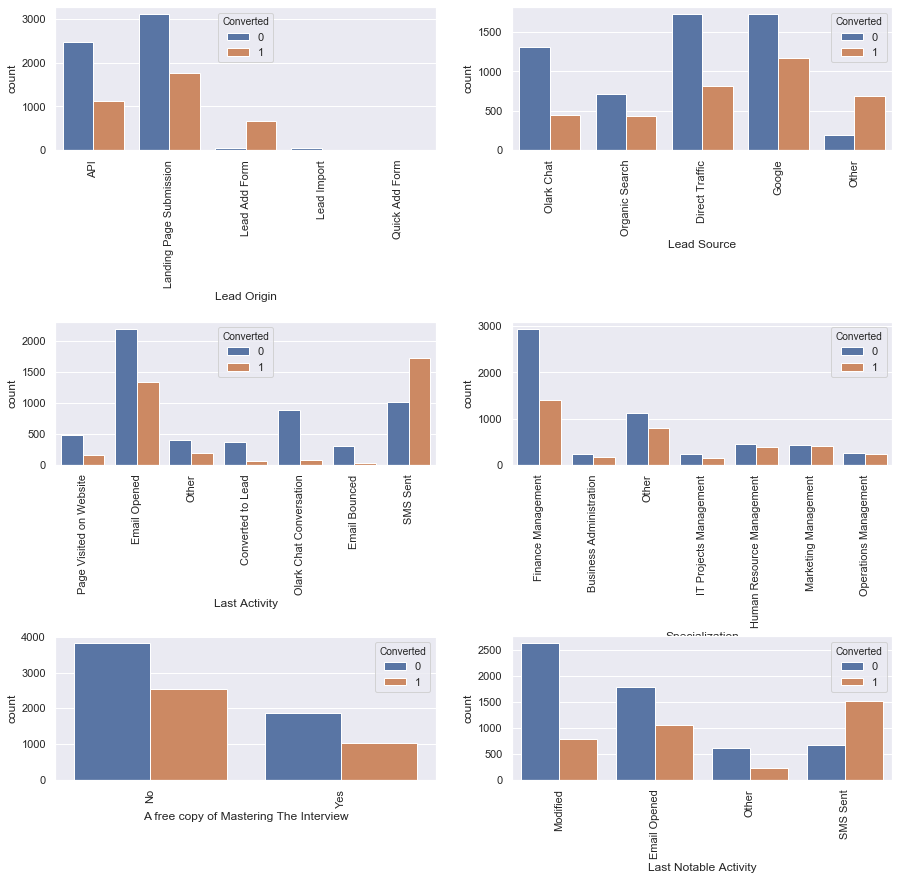

In [42]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = lead_df)
    plt.xticks(rotation=90)
# plt.savefig('cate bivar.png',dpi=300,transparent=True)
plt.show()

#### Insights :-
- In Lead Source The number of Hot leads is higher in Direct Traffic and Google less in Other Category
- In Last Activity the number of Hot leads is higher in SMS and in EMAIL cold leads is higher than hot leads.
- In Last Notable Activity it's mostly same as Last Activity.
- In Specialization the most of the leads are comes from Finance management but here Hot leads are lesseer than Cold leads.

## Step : 4 Data Preparation and Features Selection

In [43]:
lead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,No,Modified


In [44]:
# mapping of columns

lead_df['A free copy of Mastering The Interview']=lead_df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [45]:
# Dropping the Last Notable Activity as it is mostly same Last Activity
lead_df.drop('Last Notable Activity',1,inplace=True)

Creating dummies of Categorical Variables

In [46]:
dummies_df=pd.get_dummies(lead_df)
dummies_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
660727,1,2.0,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
660719,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
660681,1,2.0,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [47]:
# dropping columns on basis of anal

dummies_df=dummies_df.drop(['A free copy of Mastering The Interview','Lead Origin_Lead Add Form','Lead Source_Organic Search','Last Activity_Email Opened','Specialization_Operations Management'],1)

##  Splitting the Data into Training and Testing Sets

In [48]:
X=dummies_df.iloc[:,1:]
y=dummies_df[['Converted']]

In [49]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=.7,test_size=.3,random_state=1)

### Scaling the Features 


In [50]:
scaler=StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=\
scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

### Correlation 

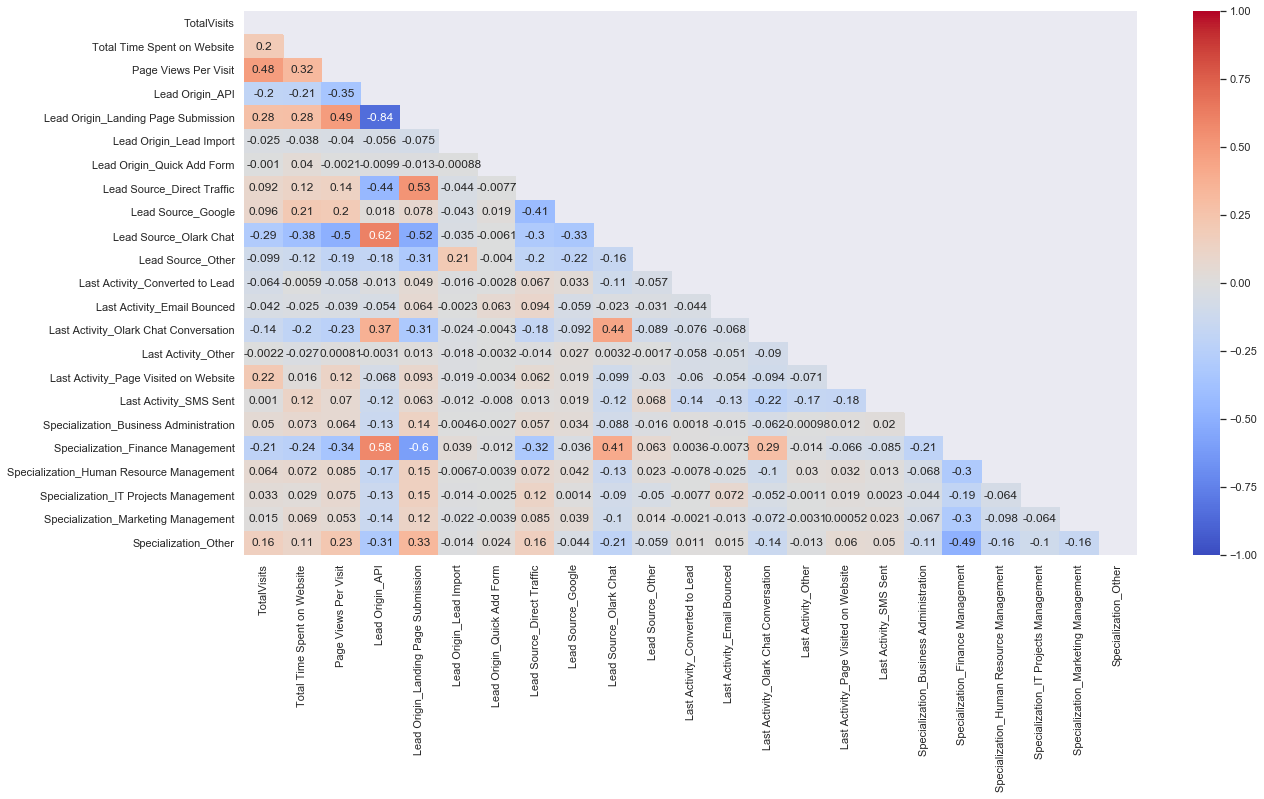

In [51]:
# Finding the Correlation using HeatMap
plt.figure(figsize = (20, 10))
mask = np.zeros(X_train.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(X_train.corr(), annot = True, vmin=-1,cmap='coolwarm',mask=mask)
plt.show()

- We can see some columns are highly correlated
- we will let RFE to decide to drop columns or not

In [52]:
# Using rfe for features selection
logreg=LogisticRegression()

In [53]:
# Running RFE with the output number of the variable equal to 20
rfe=RFE(logreg,20)    # running RFE
rfe=rfe.fit(X_train,y_train)

In [54]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True])

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 3),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Other', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', False, 2),
 ('Specialization_Marketing Management', False, 4),
 ('Specialization_Other', True, 1)]

In [56]:
# After used RFE here RFE selected these variables should be used for modeling
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Other',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management', 'Specialization_Other'],
      dtype='object')

In [57]:
# After used RFE here RFE selected these variables should not be used for modeling
X_train.columns[~rfe.support_]

Index(['Lead Origin_Quick Add Form', 'Specialization_IT Projects Management',
       'Specialization_Marketing Management'],
      dtype='object')

## Step 5: Building a Logistic Regression using statsmodel, for the detailed statistics

### Model 1

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.3
Date:                Sun, 06 Sep 2020   Deviance:                       5812.7
Time:                        17:04:24   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        3.1558      0.319      9.901      0.000       2.531       3.781
TotalVisits                                  0.1858      0.056      3.316      0.001       0.076       0.296
Total Time Spent on Website                  1.1059      0.038     28.764      0.000       1.031       1.181
Page Views Per Visit                        -0.1511      0.051     -2.938      0.003      -0.252      -0.050
Lead Origin_API                             -3.7302      0.301    -12.395      0.000      -4.320      -3.140
Lead Origin_Landing Page Submission         -4.0368      0.310    -13.019      0.000      -4.645      -3.429
Lead Origin_Lead Import                     -3.7940      0.500     -7.594      0.000      -4.773      -2.815
Lead Source_Direct Traffic                  -0.2438      0.119     -2.046      0.041      -0.477      -0.010
Lead Source_Google                           0.1157      0.110      1.056      0.291      -0.099       0.330
Lead Source_Olark Chat                       1.0167      0.158      6.434      0.000       0.707       1.326
Lead Source_Other                            0.0735      0.259      0.283      0.777      -0.435       0.582
Last Activity_Converted to Lead             -1.0793      0.200     -5.396      0.000      -1.471      -0.687
Last Activity_Email Bounced                 -1.8659      0.280     -6.658      0.000      -2.415      -1.317
Last Activity_Olark Chat Conversation       -1.7821      0.168    -10.610      0.000      -2.111      -1.453
Last Activity_Other                         -0.2684      0.137     -1.963      0.050      -0.536      -0.000
Last Activity_Page Visited on Website       -0.7414      0.148     -5.023      0.000      -1.031      -0.452
Last Activity_SMS Sent                       1.0878      0.075     14.536      0.000       0.941       1.234
Specialization_Business Administration      -0.2308      0.165     -1.397      0.163      -0.555       0.093
Specialization_Finance Management           -0.5756      0.102     -5.618      0.000      -0.776      -0.375
Specialization_Human Resource Management    -0.1508      0.129     -1.171      0.241      -0.403       0.102
Specialization_Other                        -0.1518      0.103     -1.481      0.139      -0.353       0.049
============================================================================================================
"""

In [59]:
# function to calculate vif
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [60]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,8.43
3,Lead Origin_API,7.07
17,Specialization_Finance Management,4.45
8,Lead Source_Olark Chat,4.42
6,Lead Source_Direct Traffic,3.65
7,Lead Source_Google,3.44
19,Specialization_Other,2.09
2,Page Views Per Visit,2.00
15,Last Activity_SMS Sent,1.73
9,Lead Source_Other,1.57


`Lead Source_Other` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [61]:
col=col.drop('Lead Source_Other',1)

### Model 2

In [62]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.4
Date:                Sun, 06 Sep 2020   Deviance:                       5812.8
Time:                        17:04:25   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        3.2264      0.199     16.195      0.000       2.836       3.617
TotalVisits                                  0.1862      0.056      3.335      0.001       0.077       0.296
Total Time Spent on Website                  1.1057      0.038     28.766      0.000       1.030       1.181
Page Views Per Visit                        -0.1514      0.051     -2.944      0.003      -0.252      -0.051
Lead Origin_API                             -3.7900      0.216    -17.574      0.000      -4.213      -3.367
Lead Origin_Landing Page Submission         -4.0985      0.222    -18.484      0.000      -4.533      -3.664
Lead Origin_Lead Import                     -3.7921      0.499     -7.593      0.000      -4.771      -2.813
Lead Source_Direct Traffic                  -0.2519      0.116     -2.179      0.029      -0.478      -0.025
Lead Source_Google                           0.1063      0.104      1.018      0.308      -0.098       0.311
Lead Source_Olark Chat                       1.0059      0.153      6.562      0.000       0.705       1.306
Last Activity_Converted to Lead             -1.0800      0.200     -5.401      0.000      -1.472      -0.688
Last Activity_Email Bounced                 -1.8684      0.280     -6.664      0.000      -2.418      -1.319
Last Activity_Olark Chat Conversation       -1.7819      0.168    -10.609      0.000      -2.111      -1.453
Last Activity_Other                         -0.2674      0.137     -1.956      0.051      -0.535       0.001
Last Activity_Page Visited on Website       -0.7408      0.148     -5.020      0.000      -1.030      -0.452
Last Activity_SMS Sent                       1.0865      0.075     14.544      0.000       0.940       1.233
Specialization_Business Administration      -0.2311      0.165     -1.398      0.162      -0.555       0.093
Specialization_Finance Management           -0.5756      0.102     -5.618      0.000      -0.776      -0.375
Specialization_Human Resource Management    -0.1509      0.129     -1.172      0.241      -0.403       0.102
Specialization_Other                        -0.1529      0.102     -1.493      0.135      -0.354       0.048
============================================================================================================
"""

In [63]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,8.38
3,Lead Origin_API,6.92
8,Lead Source_Olark Chat,4.18
16,Specialization_Finance Management,3.72
6,Lead Source_Direct Traffic,3.56
7,Lead Source_Google,3.33
2,Page Views Per Visit,1.94
18,Specialization_Other,1.92
14,Last Activity_SMS Sent,1.65
11,Last Activity_Olark Chat Conversation,1.55


`Specialization_Human Resource Management` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [64]:
col=col.drop('Specialization_Human Resource Management',1)

### Model 3

In [65]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2907.1
Date:                Sun, 06 Sep 2020   Deviance:                       5814.1
Time:                        17:04:26   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      3.1697      0.193     16.408      0.000       2.791       3.548
TotalVisits                                0.1845      0.056      3.310      0.001       0.075       0.294
Total Time Spent on Website                1.1047      0.038     28.763      0.000       1.029       1.180
Page Views Per Visit                      -0.1519      0.051     -2.952      0.003      -0.253      -0.051
Lead Origin_API                           -3.7823      0.216    -17.551      0.000      -4.205      -3.360
Lead Origin_Landing Page Submission       -4.0920      0.222    -18.461      0.000      -4.526      -3.658
Lead Origin_Lead Import                   -3.7935      0.500     -7.593      0.000      -4.773      -2.814
Lead Source_Direct Traffic                -0.2495      0.116     -2.159      0.031      -0.476      -0.023
Lead Source_Google                         0.1061      0.104      1.017      0.309      -0.098       0.311
Lead Source_Olark Chat                     1.0032      0.153      6.546      0.000       0.703       1.304
Last Activity_Converted to Lead           -1.0804      0.200     -5.405      0.000      -1.472      -0.689
Last Activity_Email Bounced               -1.8605      0.280     -6.639      0.000      -2.410      -1.311
Last Activity_Olark Chat Conversation     -1.7780      0.168    -10.592      0.000      -2.107      -1.449
Last Activity_Other                       -0.2682      0.137     -1.963      0.050      -0.536      -0.000
Last Activity_Page Visited on Website     -0.7440      0.148     -5.042      0.000      -1.033      -0.455
Last Activity_SMS Sent                     1.0879      0.075     14.566      0.000       0.942       1.234
Specialization_Business Administration    -0.1807      0.160     -1.133      0.257      -0.494       0.132
Specialization_Finance Management         -0.5264      0.094     -5.630      0.000      -0.710      -0.343
Specialization_Other                      -0.1028      0.093     -1.104      0.270      -0.285       0.080
==========================================================================================================
"""

In [66]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
4,Lead Origin_Landing Page Submission,7.76
3,Lead Origin_API,6.62
8,Lead Source_Olark Chat,4.18
6,Lead Source_Direct Traffic,3.56
16,Specialization_Finance Management,3.33
7,Lead Source_Google,3.33
2,Page Views Per Visit,1.93
17,Specialization_Other,1.70
14,Last Activity_SMS Sent,1.64
11,Last Activity_Olark Chat Conversation,1.55


```Lead Source_Google``` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [67]:
col=col.drop('Lead Source_Google',1)

### Model 4

In [68]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2907.6
Date:                Sun, 06 Sep 2020   Deviance:                       5815.2
Time:                        17:04:27   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      3.1695      0.193     16.401      0.000       2.791       3.548
TotalVisits                                0.1792      0.055      3.265      0.001       0.072       0.287
Total Time Spent on Website                1.1058      0.038     28.807      0.000       1.031       1.181
Page Views Per Visit                      -0.1601      0.051     -3.147      0.002      -0.260      -0.060
Lead Origin_API                           -3.7028      0.201    -18.458      0.000      -4.096      -3.310
Lead Origin_Landing Page Submission       -4.0053      0.204    -19.595      0.000      -4.406      -3.605
Lead Origin_Lead Import                   -3.7913      0.500     -7.589      0.000      -4.771      -2.812
Lead Source_Direct Traffic                -0.3279      0.086     -3.814      0.000      -0.496      -0.159
Lead Source_Olark Chat                     0.9179      0.128      7.172      0.000       0.667       1.169
Last Activity_Converted to Lead           -1.0907      0.200     -5.464      0.000      -1.482      -0.699
Last Activity_Email Bounced               -1.8659      0.280     -6.673      0.000      -2.414      -1.318
Last Activity_Olark Chat Conversation     -1.7775      0.168    -10.590      0.000      -2.106      -1.449
Last Activity_Other                       -0.2678      0.137     -1.960      0.050      -0.536    4.32e-05
Last Activity_Page Visited on Website     -0.7417      0.147     -5.032      0.000      -1.031      -0.453
Last Activity_SMS Sent                     1.0868      0.075     14.553      0.000       0.940       1.233
Specialization_Business Administration    -0.1816      0.160     -1.138      0.255      -0.494       0.131
Specialization_Finance Management         -0.5306      0.093     -5.679      0.000      -0.714      -0.347
Specialization_Other                      -0.1149      0.092     -1.244      0.214      -0.296       0.066
==========================================================================================================
"""

In [69]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_API,4.39
4,Lead Origin_Landing Page Submission,4.20
15,Specialization_Finance Management,3.32
7,Lead Source_Olark Chat,2.88
6,Lead Source_Direct Traffic,2.02
2,Page Views Per Visit,1.87
16,Specialization_Other,1.67
13,Last Activity_SMS Sent,1.64
10,Last Activity_Olark Chat Conversation,1.55
0,TotalVisits,1.36


```Specialization_Business Administration``` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [70]:
col=col.drop('Specialization_Business Administration',1)

### Model 5

In [71]:
X_train_sm=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial()).fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.14832
Method:                          IRLS   Log-Likelihood:                -2997.5
Date:                Sun, 06 Sep 2020   Deviance:                       956.82
Time:                        17:04:27   Pearson chi2:                     957.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.9694      0.021     46.683      0.000       0.929       1.010
TotalVisits                               0.0245      0.006      4.370      0.000       0.013       0.035
Total Time Spent on Website               0.1983      0.005     36.700      0.000       0.188       0.209
Page Views Per Visit                     -0.0248      0.007     -3.695      0.000      -0.038      -0.012
Lead Origin_API                          -0.5912      0.022    -26.421      0.000      -0.635      -0.547
Lead Origin_Landing Page Submission      -0.6420      0.023    -28.377      0.000      -0.686      -0.598
Lead Origin_Lead Import                  -0.6252      0.070     -8.882      0.000      -0.763      -0.487
Lead Source_Direct Traffic               -0.0539      0.013     -4.155      0.000      -0.079      -0.028
Lead Source_Olark Chat                    0.1393      0.019      7.496      0.000       0.103       0.176
Last Activity_Converted to Lead          -0.1464      0.024     -6.067      0.000      -0.194      -0.099
Last Activity_Email Bounced              -0.2015      0.026     -7.714      0.000      -0.253      -0.150
Last Activity_Olark Chat Conversation    -0.2169      0.018    -11.805      0.000      -0.253      -0.181
Last Activity_Other                      -0.0448      0.021     -2.178      0.029      -0.085      -0.004
Last Activity_Page Visited on Website    -0.1120      0.020     -5.544      0.000      -0.152      -0.072
Last Activity_SMS Sent                    0.2081      0.012     17.611      0.000       0.185       0.231
Specialization_Finance Management        -0.0813      0.013     -6.104      0.000      -0.107      -0.055
Specialization_Other                     -0.0125      0.014     -0.923      0.356      -0.039       0.014
=========================================================================================================
"""

In [72]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_API,4.30
4,Lead Origin_Landing Page Submission,3.95
14,Specialization_Finance Management,3.20
7,Lead Source_Olark Chat,2.88
6,Lead Source_Direct Traffic,2.02
2,Page Views Per Visit,1.86
13,Last Activity_SMS Sent,1.63
15,Specialization_Other,1.59
10,Last Activity_Olark Chat Conversation,1.55
0,TotalVisits,1.36


```Specialization_Other``` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [73]:
col=col.drop('Specialization_Other',1)

### Model 6

In [74]:
X_train_sm=sm.add_constant(X_train[col])
logm6=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial()).fit()
logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.14832
Method:                          IRLS   Log-Likelihood:                -2997.9
Date:                Sun, 06 Sep 2020   Deviance:                       956.95
Time:                        17:04:28   Pearson chi2:                     957.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.9651      0.020     47.685      0.000       0.925       1.005
TotalVisits                               0.0243      0.006      4.344      0.000       0.013       0.035
Total Time Spent on Website               0.1984      0.005     36.733      0.000       0.188       0.209
Page Views Per Visit                     -0.0251      0.007     -3.743      0.000      -0.038      -0.012
Lead Origin_API                          -0.5913      0.022    -26.423      0.000      -0.635      -0.547
Lead Origin_Landing Page Submission      -0.6426      0.023    -28.413      0.000      -0.687      -0.598
Lead Origin_Lead Import                  -0.6260      0.070     -8.895      0.000      -0.764      -0.488
Lead Source_Direct Traffic               -0.0537      0.013     -4.144      0.000      -0.079      -0.028
Lead Source_Olark Chat                    0.1390      0.019      7.478      0.000       0.103       0.175
Last Activity_Converted to Lead          -0.1471      0.024     -6.095      0.000      -0.194      -0.100
Last Activity_Email Bounced              -0.2020      0.026     -7.735      0.000      -0.253      -0.151
Last Activity_Olark Chat Conversation    -0.2171      0.018    -11.820      0.000      -0.253      -0.181
Last Activity_Other                      -0.0446      0.021     -2.166      0.030      -0.085      -0.004
Last Activity_Page Visited on Website    -0.1124      0.020     -5.568      0.000      -0.152      -0.073
Last Activity_SMS Sent                    0.2078      0.012     17.594      0.000       0.185       0.231
Specialization_Finance Management        -0.0767      0.012     -6.211      0.000      -0.101      -0.053
=========================================================================================================
"""

In [75]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_API,4.08
4,Lead Origin_Landing Page Submission,3.40
7,Lead Source_Olark Chat,2.88
14,Specialization_Finance Management,2.86
6,Lead Source_Direct Traffic,2.02
2,Page Views Per Visit,1.86
13,Last Activity_SMS Sent,1.62
10,Last Activity_Olark Chat Conversation,1.55
0,TotalVisits,1.36
1,Total Time Spent on Website,1.26


- Here we got all the p-value are under 0.05 and VIF is also under 5
- It can take as a Final Model

In [76]:
# Prediciting values on ytrain
y_train_pred = logm6.predict(X_train_sm).values.reshape(-1)

In [77]:
y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'], 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.176616,609431
1,0,0.053991,631817
2,0,0.016089,596164
3,0,0.181098,646570
4,0,0.028289,643974


In [78]:
#  let's take 0.5 as Cutoff
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)

In [79]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred
0,0,0.176616,609431,0
1,0,0.053991,631817,0
2,0,0.016089,596164,0
3,0,0.181098,646570,0
4,0,0.028289,643974,0


In [80]:
# Finding the metrics like accuracy, sensitivity and specicity 
def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [81]:
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)
print('Accuracy: {}, Sensitivity {}, specitiy {}'.format(acc,sensi,speci))

Accuracy: 0.7898886827458256, Sensitivity 0.629764801297648, specitiy 0.8885557221389305


Here we got low Sensitivity when randomly take the Cutoff as 0.5

In [82]:
# Finding the Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3556,  446],
       [ 913, 1553]], dtype=int64)

In [83]:
# Finding the TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [84]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.11144427786106946


In [85]:
# positive predictive value 
print (TP / float(TP+FP))

0.776888444222111


In [86]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7957037368538823


In [87]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [88]:

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

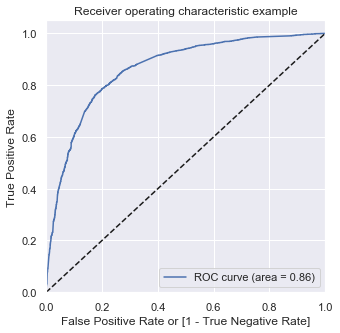

In [89]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding the optimal Point

In [90]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.176616,609431,0,1,1,0,0,0,0,0,0,0,0
1,0,0.053991,631817,0,1,0,0,0,0,0,0,0,0,0
2,0,0.016089,596164,0,1,0,0,0,0,0,0,0,0,0
3,0,0.181098,646570,0,1,1,0,0,0,0,0,0,0,0
4,0,0.028289,643974,0,1,0,0,0,0,0,0,0,0,0


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.424088  0.996350  0.071464
0.1   0.1  0.565708  0.974453  0.313843
0.2   0.2  0.665894  0.941200  0.496252
0.3   0.3  0.763915  0.869424  0.698901
0.4   0.4  0.794372  0.781427  0.802349
0.5   0.5  0.789889  0.629765  0.888556
0.6   0.6  0.765770  0.502433  0.928036
0.7   0.7  0.743352  0.401460  0.954023
0.8   0.8  0.703463  0.262774  0.975012
0.9   0.9  0.671923  0.159367  0.987756


<Figure size 1440x1080 with 0 Axes>

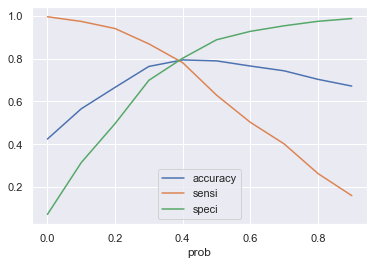

In [114]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(20,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
# plt.savefig('acc_s_s_curve',dpi=300,transparent=True)
plt.show()

Taking value 3.7  as the Final Cutoff

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.176616,609431,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.053991,631817,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.016089,596164,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.181098,646570,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.028289,643974,0,1,0,0,0,0,0,0,0,0,0,0


In [94]:
# Printing the Metrics Accuracy, Sensitivity, Specicity
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print('Accuracy: {}, Sensitivity {}, specifitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.7857142857142857, Sensitivity 0.8102189781021898, specifitiy 0.7706146926536732  


In [117]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3556,  446],
       [ 913, 1553]], dtype=int64)

In [95]:
# Finding the Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6851851851851852

In [96]:
# Finding the Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8102189781021898

In [97]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

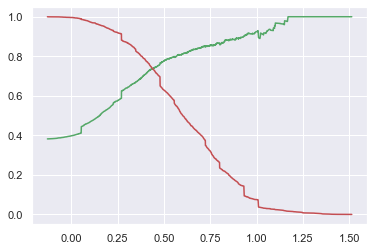

In [119]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
# plt.savefig('precision-recall_curve',dpi=300,transparent=True)
plt.show()

Here we got 0.39 as the Cut-off as Precesion-Recall Thresholdm

# Making Prediction on test set

Scaling on Test Set

In [99]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [100]:
#Adding constant
X_test_sm = sm.add_constant(X_test[col])
#Making prediction
y_test_pred = logm6.predict(X_test_sm)
y_test_pred[:10]

Lead Number
639211    0.755577
590711    0.855640
644174    0.474182
641392    0.342909
587955    0.784956
593130    0.155836
648319    0.053991
636722    0.995170
648231    0.771509
637858    0.256608
dtype: float64

In [101]:
# Converting y_pred to a dataframe which is an array
y_pred_test = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [102]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [103]:
# Appending y_test_df and y_pred_test
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [104]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,639211,0.755577
1,1,590711,0.855640
2,1,644174,0.474182
3,0,641392,0.342909
4,1,587955,0.784956


In [105]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [106]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_test_predicted
0,1,639211,0.755577,1
1,1,590711,0.855640,1
2,1,644174,0.474182,1
3,0,641392,0.342909,0
4,1,587955,0.784956,1


In [107]:
acc,sensi,speci=metrices_(y_pred_final.Converted,y_pred_final.final_test_predicted)

In [108]:
print('Accuracy: {}, Sensitivity {}, specitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.7766955266955267, Sensitivity 0.8018264840182648, specitiy 0.7602862254025045  


- We can see that our model is doing well in test set also
- Sensitivity means how our model is telling that actually converted and model prdecited them as as converted. 
- We can see that our     model is giving about .80 sensitivity.
- it means that 80 percent time our model is able to predict (actually)converted as (prdicited)converted.

### Assigning Lead Score in the data frame with respect to Lead Number 

In [109]:
# making new df with lead score
lead_scorer_df=pd.DataFrame()
df1=y_train_pred_final[['Lead Number','Converted_Prob']]
df2=y_pred_final[['Lead Number','Converted_Prob']]

In [110]:
lead_scorer_df=df1.append(df2,ignore_index=True)

In [111]:
# Assigning the value to the Lead Score by Multiplying 100
lead_scorer_df['Lead Score']=lead_scorer_df['Converted_Prob'].apply(lambda x: round((x*100),2))

In [112]:
# dropping Converted_Prob
lead_scorer_df.drop('Converted_Prob',1,inplace=True)
lead_scorer_df.head()

,Lead Number,Lead Score
0,609431,17.66
1,631817,5.40
2,596164,1.61
3,646570,18.11
4,643974,2.83


- Got the Lead Score with respect to Lead Number

## Conclusion :-
- We have noted that the variables that important the most in the potential buyers are:
    - The total time spend on the Website.
    - Total number of visits.
    - When the lead source was:
        a. Olark Chat
    - When the last activity was:
        a. SMS Sent
- The above variables that are impacting negatively the potential buyers are:
    - Lead Origin API
    - Lead Origin Landing Page Submission
    - Lead Source direct Traffic